In [38]:
!pip install matplotlip

In [39]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [40]:
data = pd.read_csv("dataset/data_with_nans.csv")

In [41]:
data.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     170 non-null    int64  
 1   Id             170 non-null    int64  
 2   SepalLengthCm  167 non-null    float64
 3   SepalWidthCm   169 non-null    float64
 4   PetalLengthCm  166 non-null    float64
 5   PetalWidthCm   168 non-null    float64
 6   Species        170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


## delete unnecessary columns

In [43]:
data.columns

Index(['Unnamed: 0', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'],
      dtype='object')

In [44]:
data.drop(labels = [data.columns[0]], axis = 1, inplace = True)

In [45]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [46]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,170.000000,167.000000,169.000000,166.000000,168.000000
mean,84.500000,5.826347,3.072781,3.707229,1.180357
std,49.218899,0.827189,0.447578,1.789382,0.765049
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,42.250000,5.100000,2.800000,1.500000,0.300000
50%,84.500000,5.800000,3.000000,4.300000,1.300000
75%,126.750000,6.400000,3.400000,5.100000,1.800000
max,169.000000,7.900000,4.400000,6.900000,2.500000


In [47]:
##species column effecting these values so we need to group them by using species. And
##then take these statistical values.

In [48]:
data.groupby("Species").agg(["min", "max", "std", "mean"])

Id                        SepalLengthCm                 \
                 min  max        std   mean           min  max       std   
Species                                                                    
Iris-setosa        0   59  17.464249   29.5           4.3  6.9  0.429014   
Iris-versicolor   60  113  15.732133   86.5           4.9  7.0  0.516189   
Iris-virginica   114  169  16.309506  141.5           4.9  7.9  0.650025   

                          SepalWidthCm                          PetalLengthCm  \
                     mean          min  max       std      mean           min   
Species                                                                         
Iris-setosa      5.034483          2.3  4.4  0.390709  3.389831           1.0   
Iris-versicolor  5.932075          2.0  4.4  0.382355  2.805556           1.5   
Iris-virginica   6.546429          2.2  3.9  0.355203  2.996429           1.3   

                                         PetalWidthCm                           
                 max       std      mean          min  max       std      mean  
Species                                                                         
Iris-setosa      5.4  0.639570  1.572414          0.1  2.1  0.295950  0.300000  
Iris-versicolor  5.1  0.623167  4.190385          0.4  1.8  0.235049  1.314815  
Iris-virginica   6.9  0.795195  5.469643          0.4  2.5  0.353215  1.992727

In [49]:
#there are NaN values we need to take care of them

In [50]:
data.isna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
165,False,False,False,False,False,False
166,False,False,False,False,False,False
167,False,False,False,False,False,False
168,False,False,False,False,False,False


In [51]:
data.isna().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [52]:
#we can delete them or change them. We need to look at the percent of dataset. We can fill it with mean.


In [53]:
for column in data.columns[1:-1]:
    data[column] = data[column].fillna(value = data[column].mean())

In [54]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [55]:
#if we wanted to drop
data.dropna(axis=0, how= "any", inplace= True)

## Visualizing

In [56]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [57]:
data["SepalLengthCm"]

0      5.1
1      4.7
2      4.9
3      4.4
4      5.0
      ... 
165    5.7
166    6.8
167    6.4
168    7.2
169    6.3
Name: SepalLengthCm, Length: 170, dtype: float64

<Axes: >

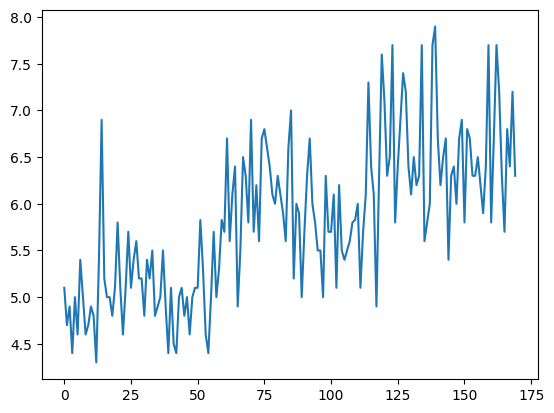

In [58]:
data["SepalLengthCm"].plot()

<Axes: xlabel='Id', ylabel='SepalLengthCm'>

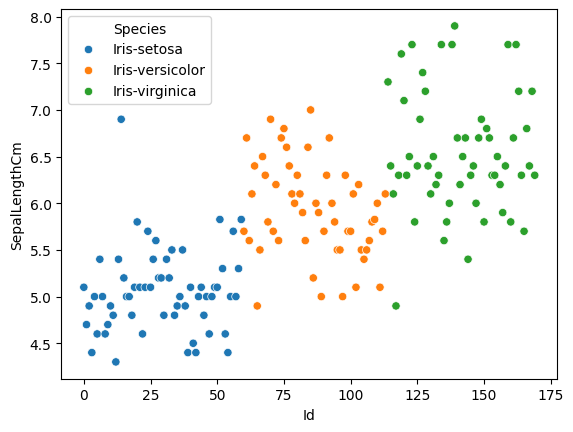

In [59]:
sns.scatterplot(data = data, x = "Id", y = "SepalLengthCm", hue = "Species")
#hue for species classification

<Axes: xlabel='Id', ylabel='PetalLengthCm'>

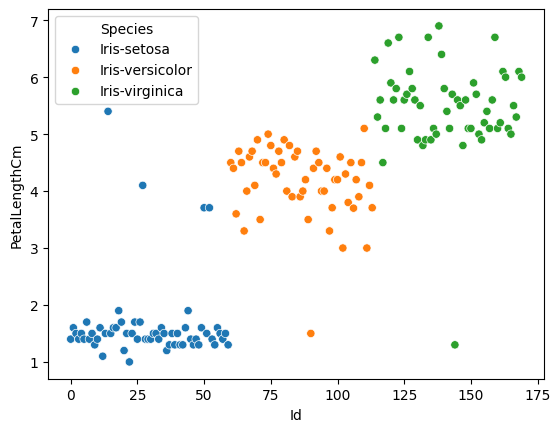

In [60]:
#there is an outlier on left top
sns.scatterplot(data=data, x = "Id", y = "PetalLengthCm" , hue = "Species")

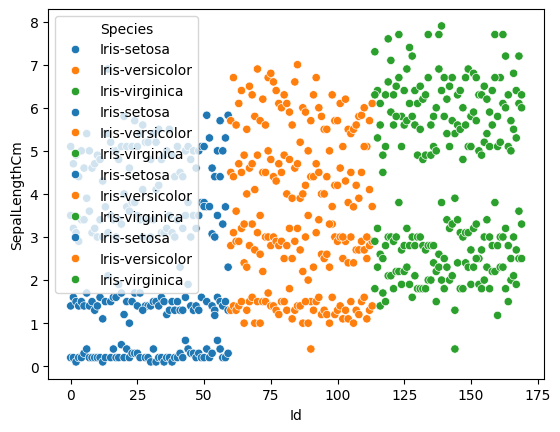

In [61]:
for column in data.columns[1:-1]:
    sns.scatterplot(data = data , x = "Id", y = column, hue = "Species")

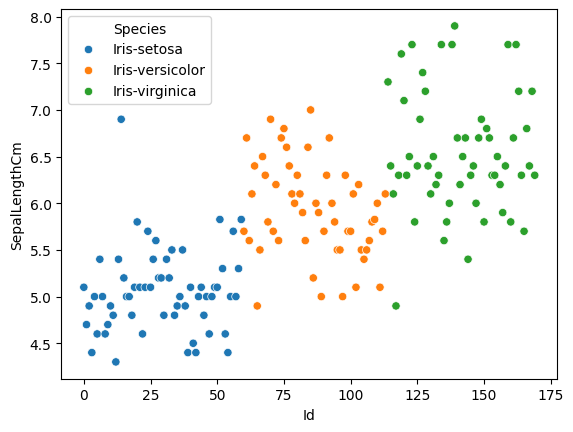

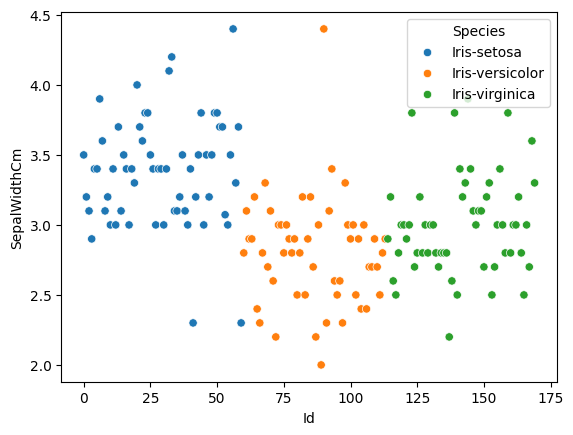

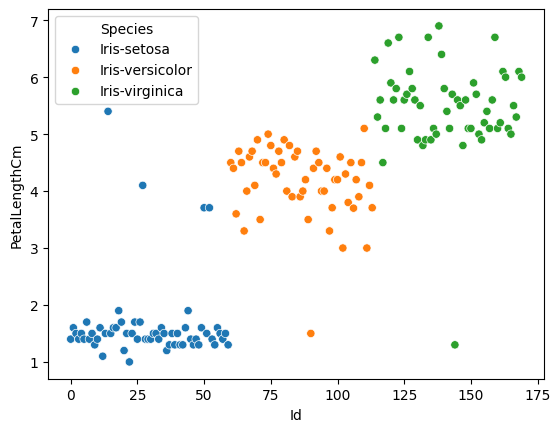

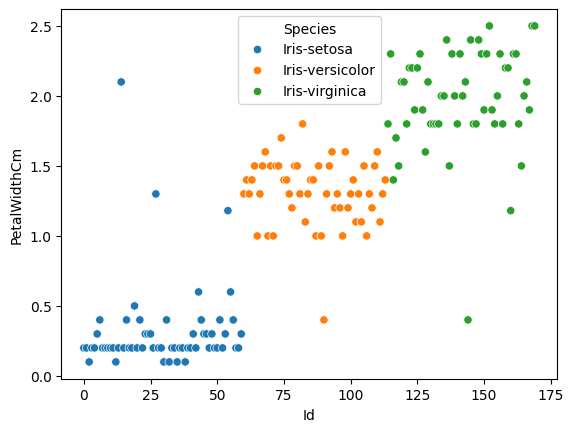

In [62]:
for column in data.columns[1:-1]:
    sns.scatterplot(data = data , x = "Id", y = column, hue = "Species")
    plt.show()

In [63]:
#as we can see there are lots of outliers..

# Outlier Detection


## 3 Sigma

In [64]:
##generally after 3 sigma long we can decide outlier

In [66]:
selected_spec = data[data["Species"] == "Iris-setosa"]

In [67]:
selected_spec["SepalLengthCm"]

0     5.100000
1     4.700000
2     4.900000
3     4.400000
4     5.000000
5     4.600000
6     5.400000
7     5.000000
8     4.600000
9     4.700000
10    4.900000
11    4.800000
12    4.300000
13    5.400000
14    6.900000
15    5.200000
16    5.000000
17    5.000000
18    4.800000
19    5.100000
20    5.800000
21    5.100000
22    4.600000
23    5.100000
24    5.700000
25    5.100000
26    5.400000
27    5.600000
28    5.200000
29    5.200000
30    4.800000
31    5.400000
32    5.200000
33    5.500000
34    4.800000
35    4.900000
36    5.000000
37    5.500000
38    4.900000
39    4.400000
40    5.100000
41    4.500000
42    4.400000
43    5.000000
44    5.100000
45    4.800000
46    5.000000
47    4.600000
48    5.000000
49    5.100000
50    5.100000
51    5.826347
52    5.300000
53    4.600000
54    4.400000
55    5.000000
56    5.700000
57    5.000000
58    5.300000
59    5.826347
Name: SepalLengthCm, dtype: float64

In [68]:
selected_column = selected_spec["SepalLengthCm"]

In [69]:
std = selected_column.std()
avg = selected_column.mean()

In [70]:
three_sigma_plus = avg + (3*std)
three_sigma_minus = avg - (3*std)

In [71]:
three_sigma_plus

6.397012123414941

In [72]:
three_sigma_minus

3.724744363611008

In [79]:
selected_column[((selected_spec["SepalLengthCm"] > three_sigma_plus) | (selected_spec["SepalLengthCm"] < three_sigma_minus))]

14    6.9
Name: SepalLengthCm, dtype: float64

In [80]:
#index 14 does not satisfy

In [81]:
#Loop through all species and columns

In [83]:
data.columns[1:-1]

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [91]:
for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
        selected_spec = data[data["Species"] == spec]
        selected_column = selected_spec[column]

        std = selected_column.std()
        avg = selected_column.mean()

        three_sigma_plus = avg + (3 * std)
        three_sigma_minus = avg - (3 * std)

        outliers = selected_spec[(selected_spec[column] > three_sigma_plus) | (selected_spec[column] < three_sigma_minus)].index

        data.drop(index=outliers, inplace=True)

        print(column, spec, outliers)
        

SepalLengthCm Iris-setosa Index([14], dtype='int64')
SepalLengthCm Iris-versicolor Index([], dtype='int64')
SepalLengthCm Iris-virginica Index([], dtype='int64')
SepalWidthCm Iris-setosa Index([], dtype='int64')
SepalWidthCm Iris-versicolor Index([90], dtype='int64')
SepalWidthCm Iris-virginica Index([], dtype='int64')
PetalLengthCm Iris-setosa Index([27, 50, 52], dtype='int64')
PetalLengthCm Iris-versicolor Index([], dtype='int64')
PetalLengthCm Iris-virginica Index([144], dtype='int64')
PetalWidthCm Iris-setosa Index([54], dtype='int64')
PetalWidthCm Iris-versicolor Index([], dtype='int64')
PetalWidthCm Iris-virginica Index([], dtype='int64')


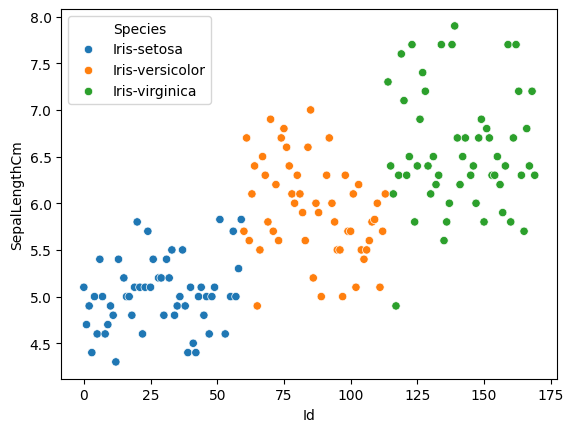

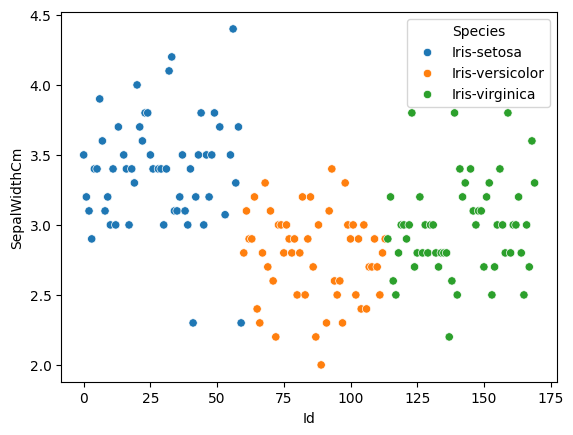

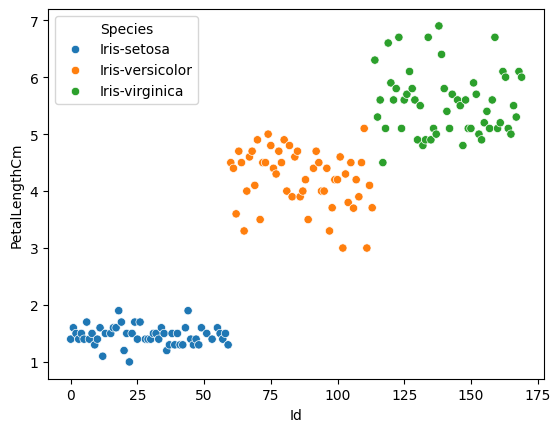

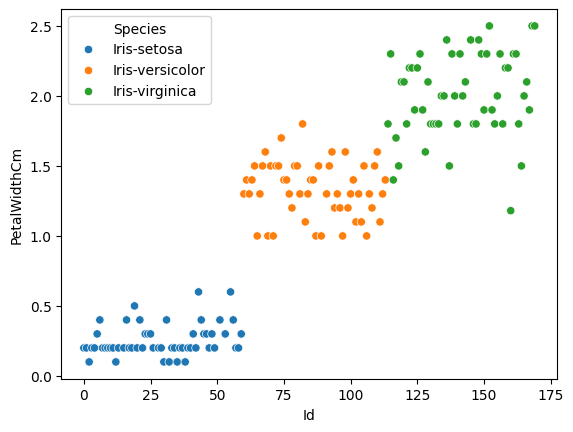

In [93]:
for column in data.columns[1:-1]:
    sns.scatterplot(data = data , x = "Id", y = column, hue = "Species")
    plt.show()

In [ ]:
#outliers gone

## IQR- QUANTILE

In [99]:
for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
        selected_spec = data[data["Species"] == spec]
        selected_column = selected_spec[column]

        q1 = selected_column.quantile(0.25) #first quarter
        q3 = selected_column.quantile(0.75) #third quarter

        iqr = q3 - q1

        min = q1 - (1.5*iqr)
        max = q3 + (1.5 * iqr)

        print(column, spec, "| min= ", min, "max = ", max)

        max_idx = data[(data["Species"] == spec) & (data[column] > max)].index
        print(max_idx)
        min_idx = data[(data["Species"] == spec) & (data[column] < min)].index
        print(min_idx)

        data.drop(index = max_idx, inplace = True)
        data.drop(index = min_idx, inplace = True)

SepalLengthCm Iris-setosa | min=  4.199999999999999 max =  5.800000000000001
Index([51, 59], dtype='int64')
Index([], dtype='int64')
SepalLengthCm Iris-versicolor | min=  4.549999999999999 max =  7.35
Index([], dtype='int64')
Index([], dtype='int64')
SepalLengthCm Iris-virginica | min=  5.15 max =  7.950000000000001
Index([], dtype='int64')
Index([117], dtype='int64')
SepalWidthCm Iris-setosa | min=  2.35 max =  4.35
Index([56], dtype='int64')
Index([41], dtype='int64')
SepalWidthCm Iris-versicolor | min=  1.75 max =  3.75
Index([], dtype='int64')
Index([], dtype='int64')
SepalWidthCm Iris-virginica | min=  2.1999999999999993 max =  3.8000000000000007
Index([], dtype='int64')
Index([], dtype='int64')
PetalLengthCm Iris-setosa | min=  1.0999999999999996 max =  1.9000000000000004
Index([], dtype='int64')
Index([22], dtype='int64')
PetalLengthCm Iris-versicolor | min=  2.8500000000000005 max =  5.6499999999999995
Index([], dtype='int64')
Index([], dtype='int64')
PetalLengthCm Iris-virgini

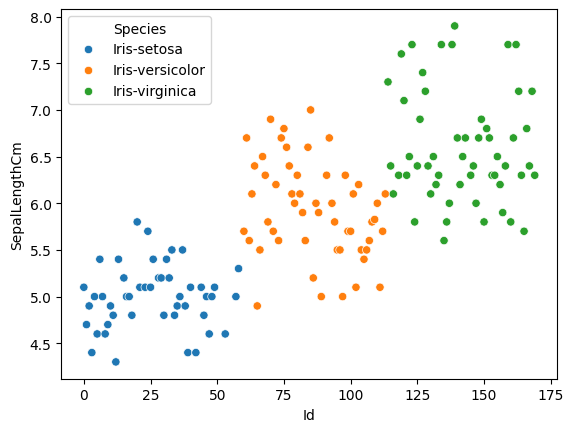

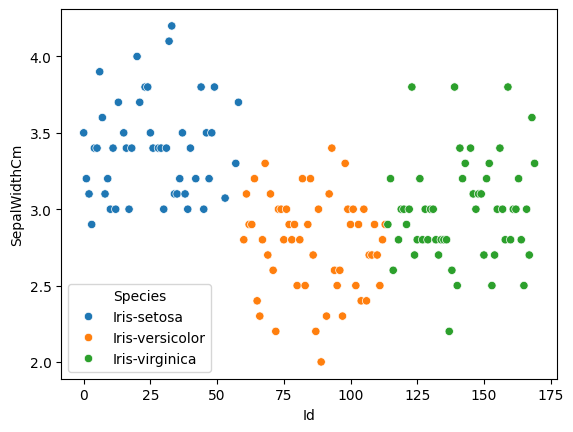

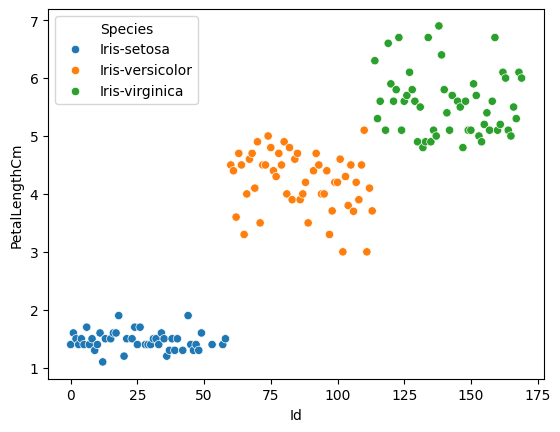

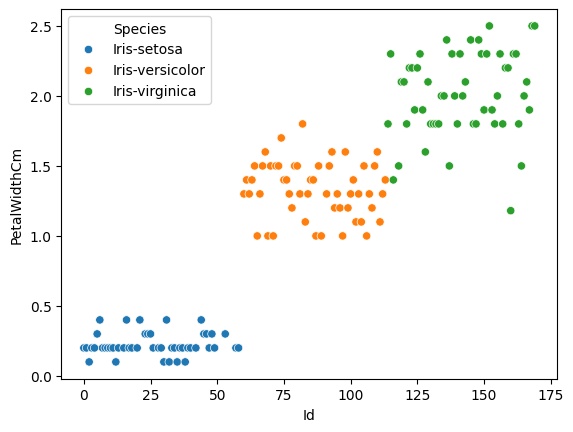

In [100]:
for column in data.columns[1:-1]:
    sns.scatterplot(data = data , x = "Id", y = column, hue = "Species")
    plt.show()

In [101]:
data.to_csv("final_dt.csv")